<a href="https://colab.research.google.com/github/xRick1x/Programacion_en_Python/blob/main/Sesion_5_Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

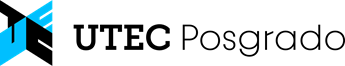


# **Módulo 3** - Sesión 5:  **Viualización de Datos Cuantitativos**
## Profesor: Germain Garcia Zanabria

### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso. Si necesitas ayuda o tienes alguna pregunta, no dudes en levantar la mano para que pueda asistirte.

**Nota:**
No olvides completar con tu análisis en las secciones: `La interpretación de tu gráfico anterior`.

## **Assignment:** Análisis Visual

El objetivo de este assignment es prácticar las técnicas de análisis exploratorio de datos para análisis univariado.

### **Paso 0:** Cargar librerías y seleccionar el conjunto de datos que se utilizará para este assignment.

In [14]:
#Importar Librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

La función `cargarDatos()` escogerá al azar el conjunto de datos (dataset) con el que trabajarás en este assignment. Además la función ya te devuelve el dataset cargado en la variable `df`

In [15]:
def cargarDatos():
  datasetList = ["taxis", "flights", "planets"]
  rand_idx = random.randrange(len(datasetList))
  random_dataset = datasetList[rand_idx]
  print("El dataset que utilizarás es: ", random_dataset)
  df = sns.load_dataset(random_dataset)
  return df

In [16]:
#Asigna el dataset al azar y carga el dataset
df= cargarDatos()
df.head()

El dataset que utilizarás es:  flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### **Paso 1:** Descubre/Explora el conjunto de datos

In [17]:
#Resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### **Ejercicio 1:** Método gráfico de un dato categórico

Analiza de manera gráfica un dato categórico de tu dataset.

<ipython-input-18-f42f07cb52ad>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='passengers', estimator=sum, ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


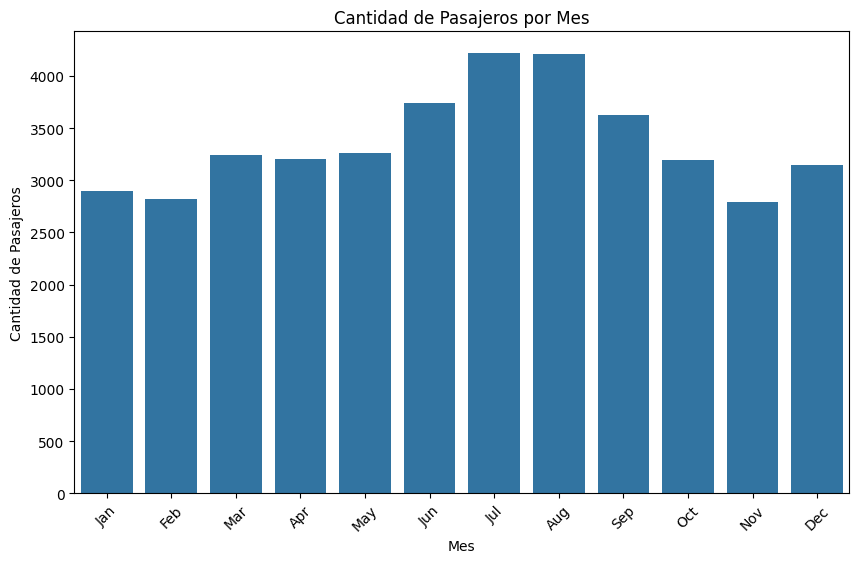

In [18]:
# Cargar el dataset flights (según la imagen)
df = sns.load_dataset("flights")

# Gráfico de barras para la cantidad de pasajeros por mes
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='passengers', estimator=sum, ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Cantidad de Pasajeros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=45)
plt.show()



**La interpretación de tu gráfico anterior:** Los meses de julio y agosto tienen la mayor cantidad de pasajeros, superando los 4,000 pasajeros. Esto podría deberse a una temporada alta de viajes posiblemente por vacaciones de verano en el hemosferio norte.
Los meses con menos pasajeros son enero, febrero, noviembre y diciembre, con cantidades cercanas a 3k pasajeros. Esto se puede relacionar con el fin de las vacaciones de invierto e inicio del año escolar.
En resumento los datos reflejan un patrón estacional claro con una demanda alta en verano y baja en invierno.

### **Ejercicio 2:** Método gráfico de un dato cuantitativo

Analiza de manera gráfica un dato cuantitativo de tu dataset.

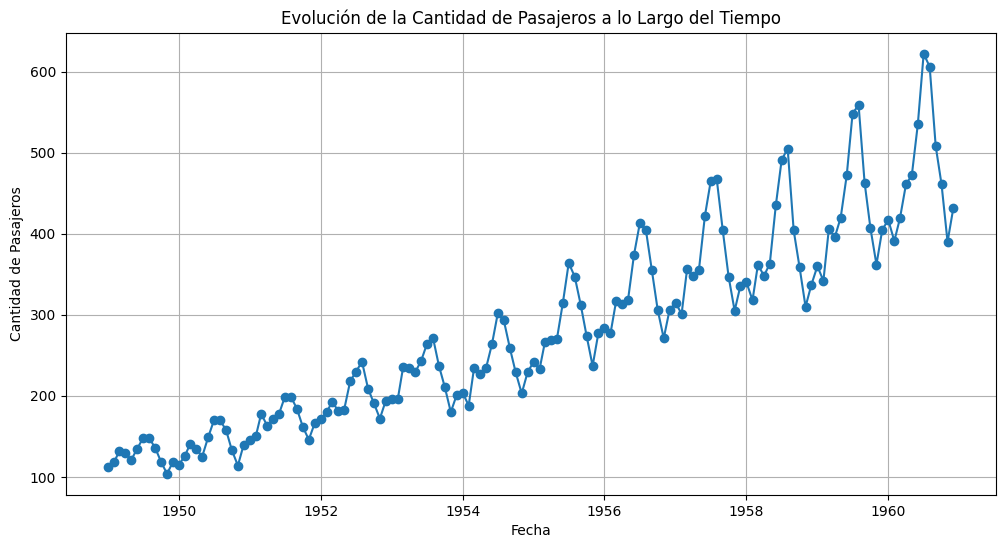

In [19]:
# Cargar el dataset flights (según la imagen)
df = sns.load_dataset("flights")

# Mapear los nombres de los meses a números
month_to_num = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
df['month'] = df['month'].map(month_to_num)

# Convertir las columnas 'year' y 'month' en un índice de fecha
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('date', inplace=True)

# Gráfico de líneas para la cantidad de pasajeros a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['passengers'], marker='o', linestyle='-')
plt.title('Evolución de la Cantidad de Pasajeros a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasajeros')
plt.grid(True)
plt.show()



**La interpretación de tu gráfico anterior:** El gráfico muestra una clara tendencia creciente en el número de pasajeros durante el período analizado. Esto indica un aumento constante en la cantidad de personas que utilizan este tipo de transporte. Además, se puede apreciar una tendencia estacional relacionada con las temporadas de vacaciones. A partir de los años 50, la pendiente de la línea parece incrementarse, lo que sugiere una aceleración en el crecimiento debido a la reducción de costos de transporte, haciéndolo más asequible para el público en general.


### **Ejercicio 3**: Método gráfico multivariado para datos cuantitativos


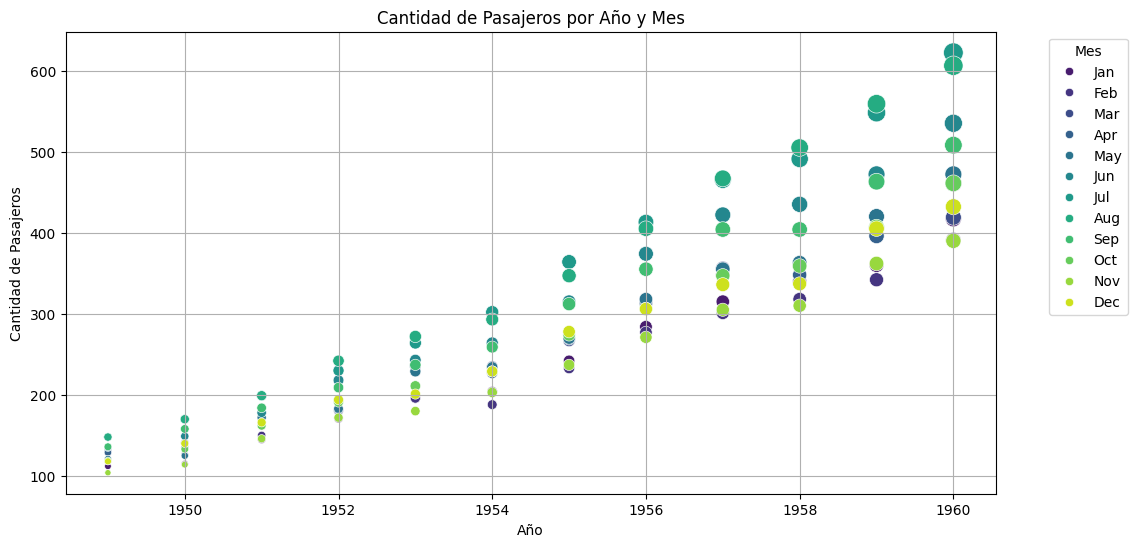

In [23]:
# Cargar el dataset flights (según la imagen)
df = sns.load_dataset("flights")

# Mapear los nombres de los meses a números
month_to_num = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
num_to_month = {v: k for k, v in month_to_num.items()}
df['month'] = df['month'].map(month_to_num)

# Crear un gráfico de dispersión con mapa de calor
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=df, x='year', y='passengers', hue='month', palette='viridis', size='passengers', sizes=(20, 200))

# Ajustar la leyenda
handles, labels = scatter.get_legend_handles_labels()
labels = [num_to_month[int(label)] for label in labels[1:13]]  # Convertir los números de meses a nombres
scatter.legend(handles[1:13], labels, title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Cantidad de Pasajeros por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Cantidad de Pasajeros')
plt.grid(True)
plt.show()



**La interpretación de tu gráfico anterior:** Este gráfico muestra que la cantidad de pasajeros creció significativamente en los años 50. Los meses con mayor concentración de pasajeros son julio y agosto, lo cual se relaciona con el periodo de vacaciones en países del hemisferio norte como Canadá, México y Estados Unidos. Se observa una reducción en la demanda de noviembre a febrero por la incorporación a clases.

Además, podemos notar que en los últimos años, la cantidad de pasajeros durante la temporada de vacaciones supera ampliamente al resto de los meses, lo que se refleja en la mayor separación entre las circunferencias de esos meses en el gráfico. Este fenómeno puede atribuirse al amplio portafolio de ofertas durante la temporada alta, lo que impulsa un aumento continuo en el número de pasajeros.
